In [72]:
import pandas as pd

In [214]:
df = pd.DataFrame.from_csv('new_dag_dataset_forscript-out.csv', sep=';', index_col=None)

In [215]:
# df = df.loc[df['year_of_birth'] < 1920]
# df = df.loc[df['year_of_birth'] > 1939]
# df = df.loc[(df['year_of_birth'] >= 1920) & (df['year_of_birth'] <= 1940)]

In [216]:
villages = sorted(set(df['village']))
vill_dict = {name: i for i, name in enumerate(villages)}
village_lang = sorted(set(df['village_lang']))
vill_lang_dict = {name: i for i, name in enumerate(village_lang)}

In [217]:
col_list = ['village_lang_int','village_int','female','close_multiling','far_multiling','rus','year_of_birth']
df['village_int'] = df['village'].apply(lambda x: vill_dict[x])
df['village_lang_int'] = df['village_lang'].apply(lambda x: vill_lang_dict[x])
for x in col_list:
    try:
        df[x] = df[x].apply(int)
    except:
        print('failure on {}'.format(x))

In [218]:
df = df[col_list]

In [219]:
df

,village_lang_int,village_int,female,close_multiling,far_multiling,rus,year_of_birth
21,8,35,0,1,1,1,1927
22,8,35,0,1,1,1,1930
23,8,35,1,0,0,0,1931
24,8,35,0,1,0,1,1931
25,8,35,0,1,0,1,1931
26,8,35,0,1,1,1,1931
27,8,35,0,1,0,1,1932
28,8,35,1,0,0,1,1932
29,8,35,1,1,0,1,1933
30,8,35,1,0,0,0,1933


### Plots

In [78]:
def split_by_decade(df, n=10):
    result = {}
    start = min(df['year_of_birth']) - min(df['year_of_birth']) % n
    finish = max(df['year_of_birth']) - max(df['year_of_birth']) % n
    x = start
    while x + n <= finish:
        result[x] = df.query('{} < year_of_birth < {}'.format(x, x + n))
        x += n
    return result

In [79]:
# years = sorted(set(df['year_of_birth']))
# result = {}
# for x in years:
#    result[x] = df.query('{} == year_of_birth'.format(x))

In [80]:
decade_split = split_by_decade(df)

In [83]:
from collections import Counter

def df_to_plottable(df, field='close_multiling'):
    female = df[df['female'] == 1]
    male = df[df['female'] == 0]
    female_counter = Counter(list(female[field]))
    male_counter = Counter(list(male[field]))
#     return male_counter, female_counter
    return counter_to_xy(male_counter), counter_to_xy(female_counter)

# для всех
def df_to_plottable1(df, field='rus'):
    female_counter = Counter(list(df[field]))
#     return male_counter, female_counter
    return counter_to_xy(female_counter)
    
def counter_to_xy(counter):
    xs = [0, 1, 2, 3, 4, 5, 6]
    ys = [(counter[x]/(sum(counter.values()) or 1)) for x in xs]
    return xs, ys

In [84]:
df_to_plottable(decade_split[1890])

(([0, 1, 2, 3, 4, 5, 6],
  [0.3541666666666667,
   0.2916666666666667,
   0.3541666666666667,
   0.0,
   0.0,
   0.0,
   0.0]),
 ([0, 1, 2, 3, 4, 5, 6],
  [0.7254901960784313,
   0.1568627450980392,
   0.11764705882352941,
   0.0,
   0.0,
   0.0,
   0.0]))

In [85]:

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("hls") # or "hls"
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline
# %pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = (8, 6)

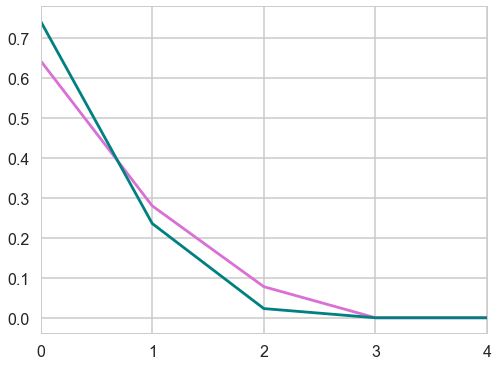

In [86]:
# по декадам отрезает все что равно нулю + 1
for x in decade_split:
    pm, pf = df_to_plottable(decade_split[x])
    plt.clf()
    plt.plot(pm[0], pm[1], color='orchid')
    plt.plot(pf[0], pf[1], color='teal')
    zero = max(pm[1].index(0), pf[1].index(0))
    plt.xticks([0,1,2,3,4,5])
    plt.xlim(0, zero + 1)
    plt.savefig('{}.png'.format(x))

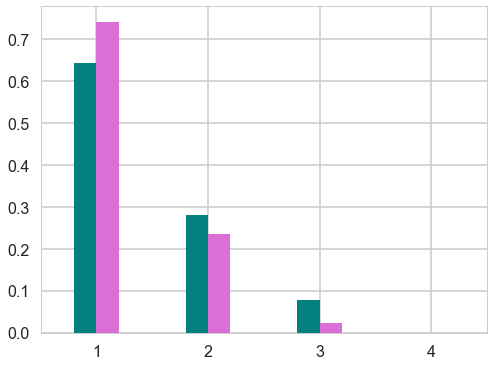

In [87]:
# по декадам отрезает все что равно нулю + 1
for x in decade_split:
    pm, pf = df_to_plottable(decade_split[x])
    plt.clf()
    plt.bar(np.arange(len(pm[0]))+0.15, pm[1], width=0.2, color="teal", label="female")
    plt.bar(np.arange(len(pf[0]))+0.35, pf[1], width=0.2, color="orchid", label="male")
    zero = max(pm[1].index(0), pf[1].index(0))
    plt.xlim(-0.25, zero+0.75)
    plt.xticks(0.25 * makearray(zero), np.arange(1, zero + 2))
    plt.savefig('{}.png'.format(x))

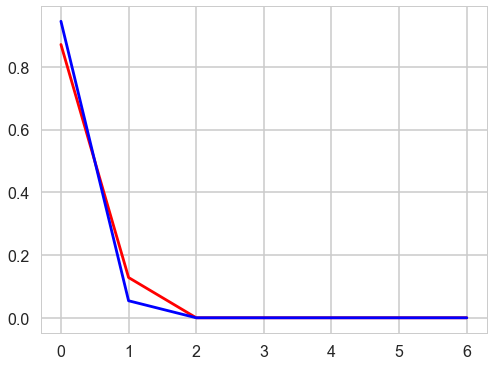

In [108]:
# по всему датафрейму
pm, pf = df_to_plottable(df)
plt.clf()
plt.plot(pm[0], pm[1], color='red')
plt.plot(pf[0], pf[1], color='blue')
plt.savefig('male_dargwa.png')

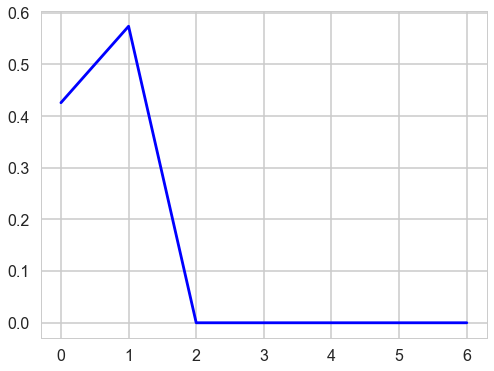

In [109]:
# без гендера
pf = df_to_plottable1(df)
plt.clf()
plt.plot(pf[0], pf[1], color='blue')
plt.savefig('pers_nogender_rus.png')

In [117]:
1992 - 1992 % 10

1990

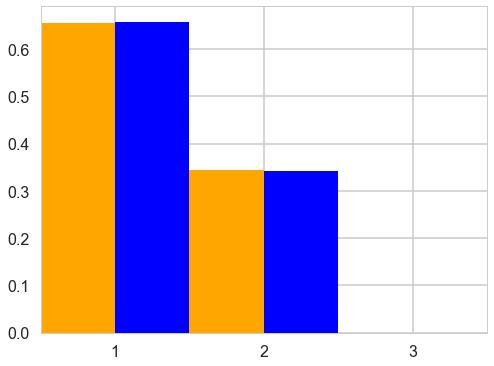

In [45]:
# plt.bar(np.arange(1,len(letternorm)),letternorm[1:], width=0.5, color="#FFA600", label="female")
# plt.bar(np.arange(1,len(bibletternorm))+0.5,bibletternorm[1:], width=0.5, color="b", label="male")
# plt.set_xticks(np.arange(len(bibletternorm)) + 0.5)
# по всему датафрейму
import numpy as np
pm, pf = df_to_plottable(df)
plt.bar(pm[0], pm[1], width=0.5, color="#FFA600", label="female")
plt.bar(np.arange(len(pf[0]))+0.5, pf[1], width=0.5, color="b", label="male")
zero = max(pm[1].index(0), pf[1].index(0))
plt.xlim(-0.25, zero+0.75)
plt.xticks(0.25 * makearray(zero), np.arange(1, zero + 2))
# plt.set_xticklabels()
plt.savefig('male_dargwa.png')

In [44]:
np.arange(1, zero + 2)

array([1, 2, 3])

In [42]:
def makearray(zero):
    result = [1]
    while len(result) < zero + 1:
        result.append(result[-1] + 4)
    return np.array(result)

makearray(zero)

array([1, 5, 9])

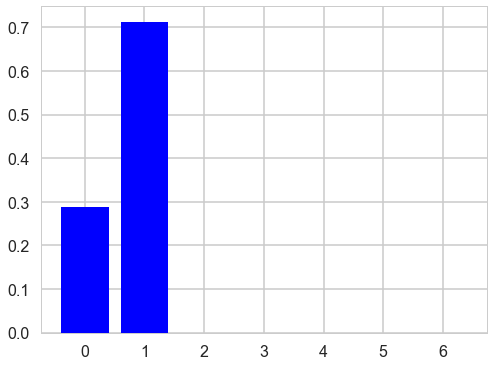

In [56]:
# без гендера
pf = df_to_plottable1(df)
plt.bar(pf[0], pf[1], color='blue')
plt.savefig('pers_nogender_rus.png')

### Classifiers

In [204]:
from sklearn.model_selection import train_test_split

def split_df(df):
    """returns x_train, x_test, y_train, y_test"""
    y = df['close_multiling']
    x = df[list(set(col_list) - {'close_multiling'})].as_matrix()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, x_test, y_train, y_test

# def split_by_year(df, year):
#     return df[df['year_of_birth'] <= year], df[df['year_of_birth'] > year]

def check_quality(predictor, x_test, y_test):
    predicted = predictor.predict(x_test)
    y_test = np.array(y_test)
    return sum(int(round(predicted[i]) == round(y_test[i])) for i in range(len(y_test))) / len(y_test)

In [205]:
x_train, x_test, y_train, y_test = split_df(df)

In [206]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=700).fit(x_train, y_train)
check_quality(rfc, x_test, y_test)

# вся выборка — ближнее многоязычие — все факторы 0.81875 ('village_lang_int','village_int','female','close_multiling','far_multiling','rus','year_of_birth') 
# вся выборка — ближнее многоязычие — без 'village_lang_int','village_int' 0.655
# вся выборка — ближнее многоязычие — без 'female' 0.79
# вся выборка — ближнее многоязычие — без 'far_multiling' 0.8025
# вся выборка — ближнее многоязычие — без 'rus' 0.77875
# вся выборка — ближнее многоязычие — без 'year_of_birth' 0.765

0.8

In [207]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=700, verbose=True).fit(x_train, y_train)
check_quality(gbc, x_test, y_test)
# вся выборка — ближнее многоязычие — все факторы 0.82625 ('village_lang_int','village_int','female','close_multiling','far_multiling','rus','year_of_birth') 
# вся выборка — ближнее многоязычие — без 'village_lang_int','village_int' 0.66125
# вся выборка — ближнее многоязычие — без 'female' 0.82
# вся выборка — ближнее многоязычие — без 'far_multiling' 0.795
# вся выборка — ближнее многоязычие — без 'rus' 0.8275
# вся выборка — ближнее многоязычие — без 'year_of_birth' 0.8

      Iter       Train Loss   Remaining Time 
         1        3376.8380            5.24s
         2        3146.4025            5.21s
         3        2955.7232            5.39s
         4        2796.9416            5.14s
         5        2668.5746            5.25s
         6        2554.6121            5.18s
         7        2454.4202            5.04s
         8        2375.5048            4.96s
         9        2304.1731            4.87s
        10        2242.6903            4.80s
        20        1879.8859            4.54s
        30        1707.6759            4.28s
        40        1592.3492            4.27s
        50        1525.0601            4.14s
        60        1481.0544            4.06s
        70        1453.5398            3.99s
        80        1428.9461            3.97s
        90        1408.8983            3.86s
       100        1394.5101            3.76s
       200        1326.3153            3.11s
       300        1301.0251            2.43s
       40

0.8

In [12]:
from sklearn.svm import SVC

svc = SVC().fit(x_train, y_train)
check_quality(svc, x_test, y_test)

0.5294117647058824

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
check_quality(knc, x_test, y_test)

0.48788927335640137

In [17]:
from sklearn.linear_model import Perceptron

p = Perceptron().fit(x_train, y_train)
check_quality(p, x_test, y_test)

0.27335640138408307

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(x_train, y_train)
check_quality(dtc, x_test, y_test)

0.47923875432525953